In [1]:
#from pyspark.sql import SparkSession

# Initialize a Spark session
#spark = SparkSession.builder.appName("BreweryAnalysis").getOrCreate()

In [2]:
# Load the cleaned data from Hive
#cleaned_data = spark.sql("SELECT * FROM final_cleaned_brewery_data")

In [3]:
import pandas as pd

cleaned_data = pd.read_csv("data.csv")

print(cleaned_data.head())

   Batch_ID            Brew_Date  Beer_Style   SKU      Location  \
0   7870796  2020-01-01 00:00:19  Wheat Beer  Kegs    Whitefield   
1   9810411  2020-01-01 00:00:31        Sour  Kegs    Whitefield   
2   2623342  2020-01-01 00:00:40  Wheat Beer  Kegs   Malleswaram   
3   8114651  2020-01-01 00:01:37         Ale  Kegs   Rajajinagar   
4   4579587  2020-01-01 00:01:43       Stout  Cans  Marathahalli   

   Fermentation_Time  Temperature  pH_Level   Gravity  Alcohol_Content  \
0                 16    24.204251  5.289845  1.039504         5.370842   
1                 13    18.086763  5.275643  1.059819         5.096053   
2                 12    15.539333  4.778016  1.037476         4.824737   
3                 17    16.418489  5.345261  1.052431         5.509243   
4                 18    19.144908  4.861854  1.054296         5.133625   

   Bitterness  Color Ingredient_Ratio  Volume_Produced   Total_Sales  \
0        20.0    5.0      1:0.32:0.16           4666.0   2664.759345   
1 

In [4]:
cleaned_data = cleaned_data.dropna()

In [5]:
# Summary statistics
summary_stats = cleaned_data.describe()
print(summary_stats)

           Batch_ID  Fermentation_Time   Temperature      pH_Level  \
count  6.759430e+06       6.759430e+06  6.759430e+06  6.759430e+06   
mean   4.999735e+06       1.450087e+01  2.000009e+01  4.999967e+00   
std    2.886445e+06       2.872209e+00  2.886702e+00  2.886228e-01   
min    0.000000e+00       1.000000e+01  1.500001e+01  4.500000e+00   
25%    2.500142e+06       1.200000e+01  1.750048e+01  4.750081e+00   
50%    5.000366e+06       1.500000e+01  2.000005e+01  4.999939e+00   
75%    7.499062e+06       1.700000e+01  2.250000e+01  5.249986e+00   
max    9.999997e+06       1.900000e+01  2.500000e+01  5.500000e+00   

            Gravity  Alcohol_Content    Bitterness         Color  \
count  6.759430e+06     6.759430e+06  6.759430e+06  6.759430e+06   
mean   1.055001e+00     5.249654e+00  3.949678e+01  1.199875e+01   
std    1.443462e-02     4.329428e-01  1.154468e+01  4.321132e+00   
min    1.030000e+00     4.500000e+00  2.000000e+01  5.000000e+00   
25%    1.042504e+00     4.874

In [6]:
# Complex Query
grouped_data = cleaned_data.groupby('Beer_Style')['Fermentation_Time'].mean()
print(grouped_data)

Beer_Style
Ale           14.501389
IPA           14.501996
Lager         14.501555
Pilsner       14.500940
Porter        14.494261
Sour          14.500955
Stout         14.500224
Wheat Beer    14.505623
Name: Fermentation_Time, dtype: float64


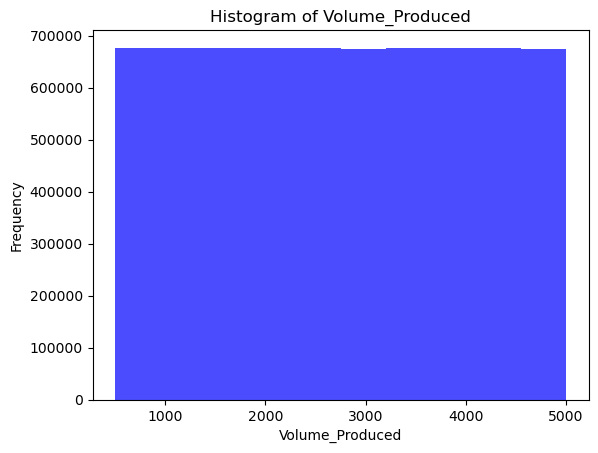

In [7]:
import matplotlib.pyplot as plt

# Visualization
plt.hist(cleaned_data['Volume_Produced'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Volume_Produced')
plt.ylabel('Frequency')
plt.title('Histogram of Volume_Produced')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [9]:
X = cleaned_data[['Temperature']]
y = cleaned_data['pH_Level']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
predictions = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.08329897718119891


In [14]:
cleaned_data['Fermentation_Time'] = pd.to_datetime(cleaned_data['Fermentation_Time'])

In [15]:
import matplotlib
matplotlib.rcParams['agg.path.chunksize'] = 10000

C:\Users\elvin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


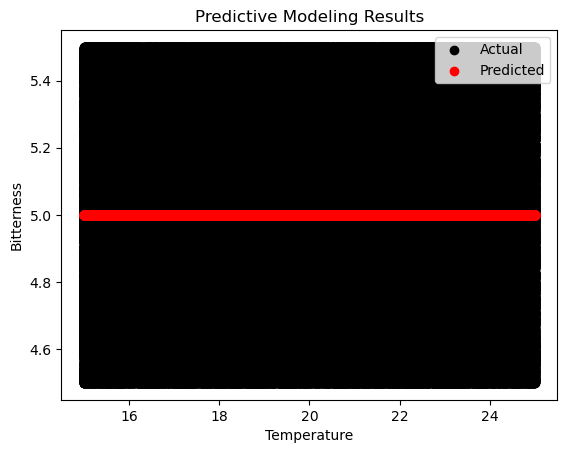

In [16]:
plt.scatter(X_test['Temperature'], y_test, color='black', label='Actual')
plt.scatter(X_test['Temperature'], predictions, color='red', label='Predicted')
plt.title('Predictive Modeling Results')
plt.xlabel('Temperature')
plt.ylabel('Bitterness')
plt.legend()
plt.show()

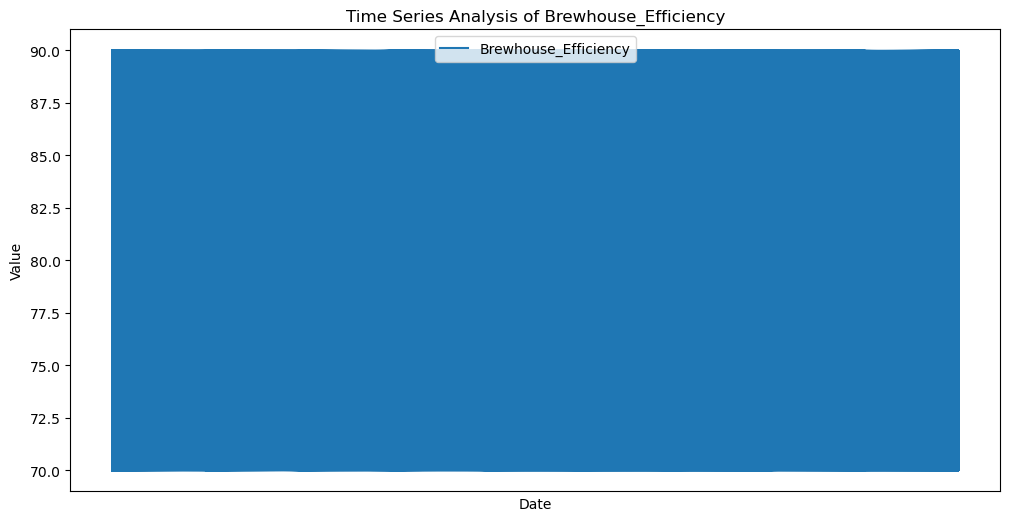

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Fermentation_Time'], cleaned_data['Brewhouse_Efficiency'], label='Brewhouse_Efficiency')
plt.title('Time Series Analysis of Brewhouse_Efficiency')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()